In [ ]:
num = 100**4
print(f"{num:,}")

100,000,000


In [ ]:
import pandas as pd
import duckdb

mydf = pd.DataFrame({'a' : [1,2,3]})

duckdb.query("SELECT SUM(a) from mydf").to_df()

duckdb.query("SELECT CONCAT(a,' wow') from mydf").to_df()

,"concat(a, ' wow')"
0,1 wow
1,2 wow
2,3 wow


In [ ]:
# polars lazy execution (defers computations until the collect() method is called)
# example:
import polars as pl

#pl_df = pl.DataFrame(data)

pl_df = pl.DataFrame({'Cat1' : ['a','a','a','b','c','d'],
                      'Cat2' : ['a','b','b','b','c','d'],
                      'Num1' : [45,70,79,80,90,95]})
#%%timeit
pl_df.lazy().filter(
    (pl.col('Cat1') == 'a') &
    (pl.col('Cat2') == 'b') &
    (pl.col('Num1') > 70)
).collect()

#%%timeit
# Versus less efficient more pandas way of pulling values
pl_df.filter(
    (pl.col('Cat1') == 'a') &
    (pl.col('Cat2') == 'b') &
    (pl.col('Num1') > 70)
)

Cat1,Cat2,Num1
str,str,i64
"""a""","""b""",79


In [ ]:
duckdb.query("SELECT *, RANK() OVER(ORDER BY Num1 desc) Rank FROM pl_df ORDER BY Rank")

┌─────────┬─────────┬───────┬───────┐
│  Cat1   │  Cat2   │ Num1  │ Rank  │
│ varchar │ varchar │ int64 │ int64 │
├─────────┼─────────┼───────┼───────┤
│ d       │ d       │    95 │     1 │
│ c       │ c       │    90 │     2 │
│ b       │ b       │    80 │     3 │
│ a       │ b       │    79 │     4 │
│ a       │ b       │    70 │     5 │
│ a       │ a       │    45 │     6 │
└─────────┴─────────┴───────┴───────┘

In [ ]:
duckdb.query("SELECT *, RANK() OVER(ORDER BY Num1 asc) Rank FROM pl_df ORDER BY Rank").to_df()

,Cat1,Cat2,Num1,Rank
0,a,a,45,1
1,a,b,70,2
2,a,b,79,3
3,b,b,80,4
4,c,c,90,5
5,d,d,95,6


In [ ]:
duckdb.query("SELECT *, DENSE_RANK() OVER(PARTITION BY Cat1 ORDER BY Num1 asc) Rank FROM pl_df ORDER BY Rank").to_df()

,Cat1,Cat2,Num1,Rank
0,b,b,80,1
1,c,c,90,1
2,a,a,45,1
3,d,d,95,1
4,a,b,70,2
5,a,b,79,3


In [ ]:
duckdb.query("SELECT *, RANK() OVER(ORDER BY Num1 asc) Rank FROM pl_df WHERE Cat1 == 'a' ORDER BY Rank").to_df()

,Cat1,Cat2,Num1,Rank
0,a,a,45,1
1,a,b,70,2
2,a,b,79,3


In [ ]:
duckdb.query("SELECT Cat1, SUM(Num1) AS sum_num FROM pl_df GROUP BY Cat1 HAVING SUM(Num1) < 195 order by sum_num desc")

┌─────────┬─────────┐
│  Cat1   │ sum_num │
│ varchar │ int128  │
├─────────┼─────────┤
│ a       │     194 │
│ d       │      95 │
│ c       │      90 │
│ b       │      80 │
└─────────┴─────────┘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Simulated data for analysis
np.random.seed(42)
data = {
    'user_id': np.arange(1, 101),
    'age': np.random.randint(18, 65, size=100),
    'purchase_amount': np.random.uniform(10, 200, size=100)
}
df = pd.DataFrame(data)

# Connecting to an SQLite database
conn = sqlite3.connect('sample_db.sqlite')

# Writing the DataFrame to the database
df.to_sql('user_data', conn, if_exists='replace', index=False)

# Performing SQL queries using pandas
query = "SELECT AVG(age) as avg_age, AVG(purchase_amount) as avg_purchase FROM user_data"
result = pd.read_sql_query(query, conn)
print(result)

   avg_age  avg_purchase
0    40.88    101.443893


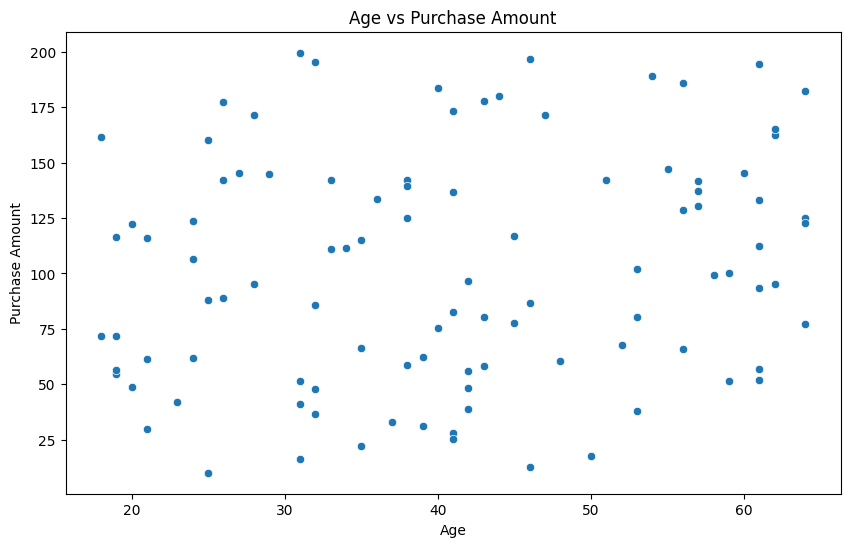

In [3]:
# Data visualization using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='purchase_amount')
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

In [4]:
# Python code to process and analyze data
avg_age = df['age'].mean()
avg_purchase = df['purchase_amount'].mean()

print(f"Average Age: {avg_age:.2f}")
print(f"Average Purchase Amount: ${avg_purchase:.2f}")

Average Age: 40.88
Average Purchase Amount: $101.44


In [5]:
# Example Python code to generate insights
age_group_counts = df['age'].value_counts().sort_index()
most_common_age = age_group_counts.idxmax()

print(f"Most Common Age: {most_common_age}")
print(age_group_counts)

Most Common Age: 61
18    2
19    4
20    2
21    3
23    1
24    3
25    3
26    3
27    1
28    2
29    1
31    4
32    4
33    2
34    1
35    3
36    1
37    1
38    4
39    2
40    2
41    5
42    4
43    3
44    1
45    2
46    3
47    1
48    1
50    1
51    1
52    1
53    3
54    1
55    1
56    3
57    3
58    1
59    2
60    1
61    6
62    3
64    4
Name: age, dtype: int64
